# Mini Project

## 프로젝트 설명

- 머신러닝 워크플로우를 완벽하기 이해하고 사용하기 위한 프로젝트입니다.
- Kaggle의 PUBG 순위 예측 대회 데이터를 사용합니다.

## 데이터 설명

- PUBG 게임에서는 각 매치(matchId)에 최대 100명의 플레이어가 시작합니다. 
- 플레이어는 탈락한 다른 팀이 얼마나 생존해 있는지를 기준으로 게임 종료 시 순위(winPlacePerc)가 매겨지는 팀(groupId)에 속할 수 있습니다. 
- 게임에서 플레이어는 다양한 무기를 집어들고, 죽지 않은(knocked) 동료들을 되살리고, 차량을 운전하고, 수영하고, 뛰고, 쏘고, 모든 결과를 경험할 수 있습니다.
- 예를 들어 너무 멀리 떨어지거나, 멀리서 달려오다가(자기장 밖에서) 스스로 죽는 것입니다.

- 각 행에 한 플레이어의 post-game 통계를 포함하도록 포맷된 익명화된 PUBG 게임 통계를 다수 제공합니다. 
- 데이터는 모든 타입(솔로, 듀오, 스쿼드, 커스텀 등)의 매치에서 가져옵니다.
- 경기당 100명 또는 그룹당 최대 4명의 플레이어가 있다는 보장은 없습니다.

- 1(1위)부터 0(1위)까지의 scaling 된, 최종 통계를 기준으로 선수의 결승 배치를 예측하는 모델을 만들어야 합니다.

## 변수 설명

- **Id** - 플레이어 식별 ID
- **groupId** - 매치 내에서 그룹을 식별하는 정수 ID. 같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우, 매번 다른 그룹 ID를 가집니다.
- **matchId** - 매치를 식별할 정수 ID. 훈련 세트와 테스트 세트 모두 일치하는 항목이 없습니다.
- **assists** - 이 플레이어가 피해를 입힌 적 플레이어 중 동료에게 살해된 플레이어 수.
- **boosts** - 사용된 부스트(에너지 드링크, 진통제 등) 항목 수.
- **damageDealt** - 총 데미지 량. 참고: 자해 제외.
- **DBNOs** - 넉다운 시킨 플레이어 수.
- **headshotKills** - 헤드샷으로 제거한 적 플레이어의 수.
- **heals** - 사용된 치료키트(붕대, 구급상자 등) 항목 수.
- **killPlace** - 죽은 적 플레이어의 수에 따른 매치 내 순위.
- **killPoints** - 킬 기반 플레이어의 외부 순위. (킬만 생각하는 [Elo](https://ko.wikipedia.org/wiki/%EC%97%98%EB%A1%9C_%ED%8F%89%EC%A0%90_%EC%8B%9C%EC%8A%A4%ED%85%9C) 순위라고 생각하시면 됩니다.)
- **kills** - 제거한 적 플레이어의 수.
- **killStreaks** - 짧은 시간 내에 제거한 적 플레이어 수 중 최대치.
- **longestKill** - 처치(kill) 시 제거한 플레이어와 플레이어의 가장 긴 거리. - 플레이어를 쓰러뜨리고 차를 몰고 도망가면 가장 긴 Kill stat가 발생할 수 있기 때문에 오해의 소지가 있을 수 있습니다.
- **maxPlace** - 매치에서 가장 낮은 순위. 데이터가 순위를 건너뛰기 때문에 이 값은 numGroups와 일치하지 않을 수 있습니다.
- **numGroups** - 우리가 가지고 있는 매치 데이터 내 플레이어 그룹 수.
- **revives** - 이 플레이어가 팀원을 부활시킨 횟수.
- **rideDistance** - 미터 단위로 측정한 차량의 총 주행 거리.
- **roadKills** - 로드킬 횟수.
- **swimDistance** - 미터 단위로 측정한 수영으로 이동한 총 거리.
- **teamKills** - 팀킬 횟수.
- **vehicleDestroys** - 파괴된 차량 수.
- **walkDistance** - 미터 단위로 측정한 도보로 이동한 총 거리.
- **weaponsAcquired** - 주운 무기의 수.
- **winPoints** - 승자 기준 외부 순위. (승자만이 중요한 [Elo](https://ko.wikipedia.org/wiki/%EC%97%98%EB%A1%9C_%ED%8F%89%EC%A0%90_%EC%8B%9C%EC%8A%A4%ED%85%9C) 순위라고 생각하시면 됩니다.)
- **winPlacePerc** - 예측 대상(target). 백분위수 승리 배치로, 1은 1위, 0은 경기 꼴찌에 해당합니다. 이 값은 numGroups가 아닌 maxPlace에서 계산되므로, 매체에 누락된 chunks(상당한 양)가 있을 수 있습니다.

# 데이터를 이해하기 위한 EDA

## 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
viridis = sns.color_palette("viridis_r")
oranges = sns.color_palette("Oranges")
blues = sns.color_palette("Blues")
pastel1 = sns.color_palette("Pastel1")
display(viridis)
display(oranges)
display(blues)
display(pastel1)

[(0.626579, 0.854645, 0.223353),
 (0.288921, 0.758394, 0.428426),
 (0.122312, 0.633153, 0.530398),
 (0.153364, 0.497, 0.557724),
 (0.212395, 0.359683, 0.55171),
 (0.275191, 0.194905, 0.496005)]

[(0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626)]

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

In [3]:
train = pd.read_csv('../data/train_V2.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


- Id, groupId, matchId 는 비공개 데이터
- 드랍해도 상관없을 것 같습니다

## Kill

In [7]:
sns.set_theme(style="whitegrid", palette="Oranges")

In [8]:
print(f"평균 킬 : {train['kills'].mean()}")
print(f"상위 1퍼 : {train['kills'].quantile(0.99)}")
print(f"MAX 킬 : {train['kills'].max()}")

평균 킬 : 0.9247833241810259
상위 1퍼 : 7.0
MAX 킬 : 72


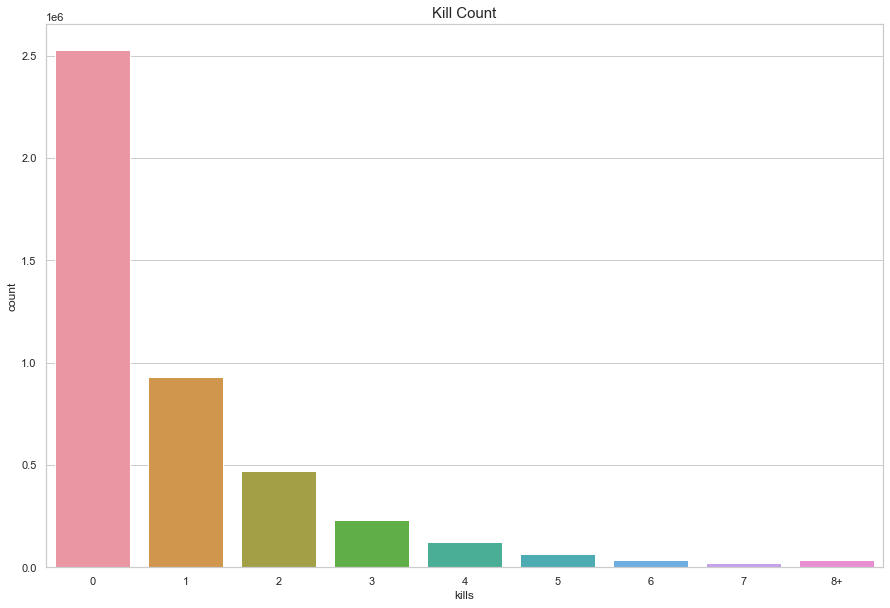

In [9]:
data = train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)] = '8+'

plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype(str).sort_values())
plt.title('Kill Count', fontsize=15)
plt.show()

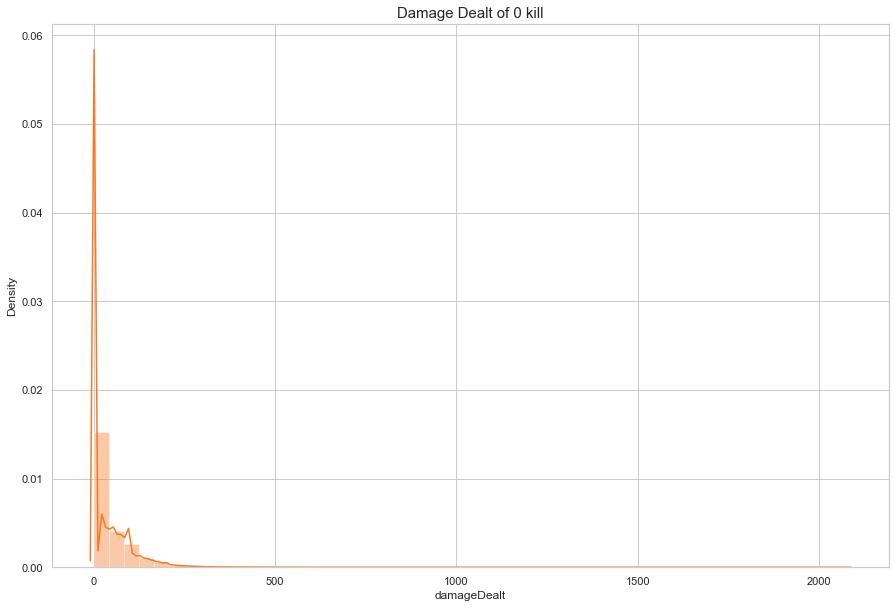

In [10]:
data = train.copy()
data = data[data['kills']==0]

plt.figure(figsize=(15,10))
sns.distplot(data['damageDealt'], color=oranges[3])
plt.title('Damage Dealt of 0 kill', fontsize=15)
plt.show()

In [11]:
print(f"{len(data[data['winPlacePerc']==1])}\t명의 플레이어가\t({100*len(data[data['winPlacePerc']==1])/len(train):.4f}%) 킬 없이 우승")

data1 = train[train['damageDealt'] == 0].copy()
print(f"{len(data1[data1['winPlacePerc']==1])}\t명의 플레이어가  \t({100*len(data1[data1['winPlacePerc']==1])/len(train):.4f}%) 데미지 없이 우승")

16666	명의 플레이어가	(0.3748%) 킬 없이 우승
4770	명의 플레이어가  	(0.1073%) 데미지 없이 우승


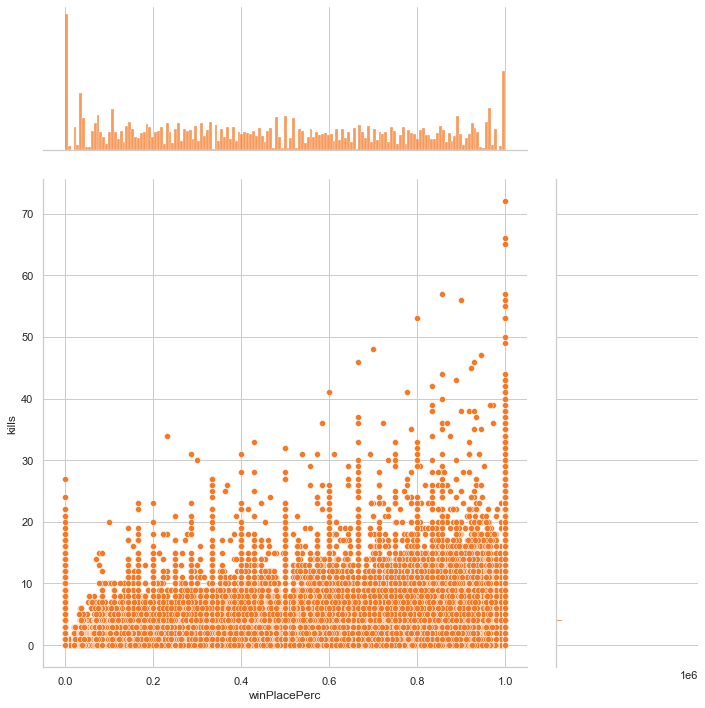

In [12]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color=oranges[3])
plt.show()

- **`kills`**는 **`winPlacePerc`**사이에는 좀 높은 상관관계가 있습니다.
- (0킬, 1-3킬, 4-6킬, 7-9킬, 10+킬)을 기준으로 그룹화합니다.

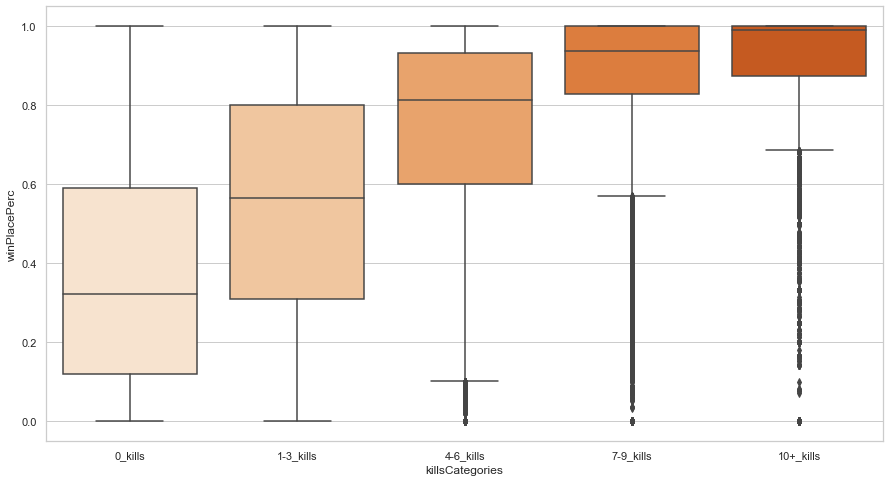

In [13]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 72], labels=['0_kills','1-3_kills', '4-6_kills', '7-9_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

## Walk

In [14]:
sns.set_theme(style="whitegrid", palette="viridis_r")

In [15]:
print(f"평균 도보 거리 : {train['walkDistance'].mean():.1f}m")
print(f"상위 1% : {train['walkDistance'].quantile(0.99):.1f}m")
print(f"MAX 도보 거리 : {train['walkDistance'].max():.1f}m")

평균 도보 거리 : 1154.2m
상위 1% : 4396.0m
MAX 도보 거리 : 25780.0m


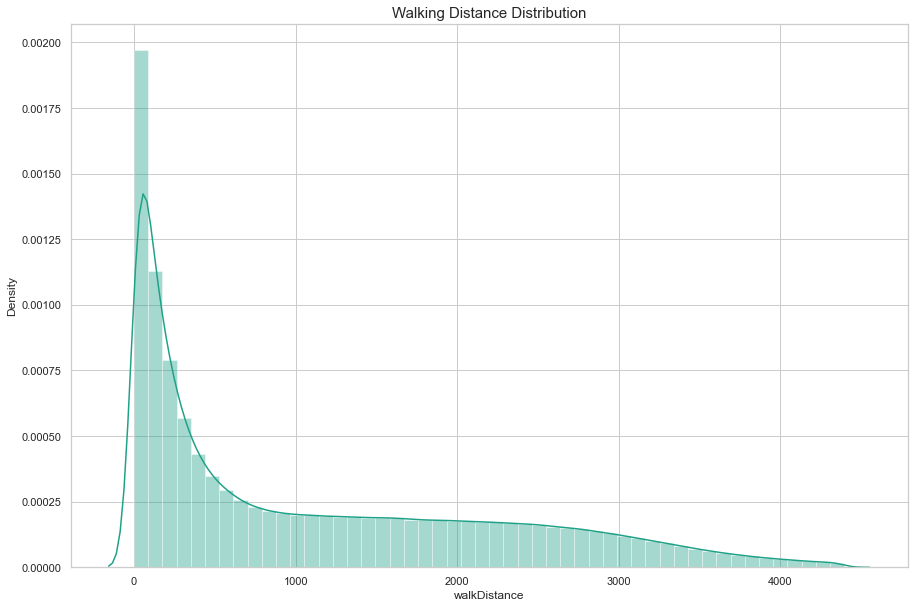

In [16]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'], color=viridis[2])
plt.show()

In [17]:
print(f"{len(data[data['walkDistance'] == 0])}명의 플레이어가 ({100*len(data1[data1['walkDistance']==0])/len(train):.4f}%) 0미터를 걸었습니다.")

99603명의 플레이어가 (2.0329%) 0미터를 걸었습니다.


- 이것은 한 발자국도 내딛지 못하고 죽거나 혹은 그들이 뒷걸음질 친다는 것을 의미합니다.

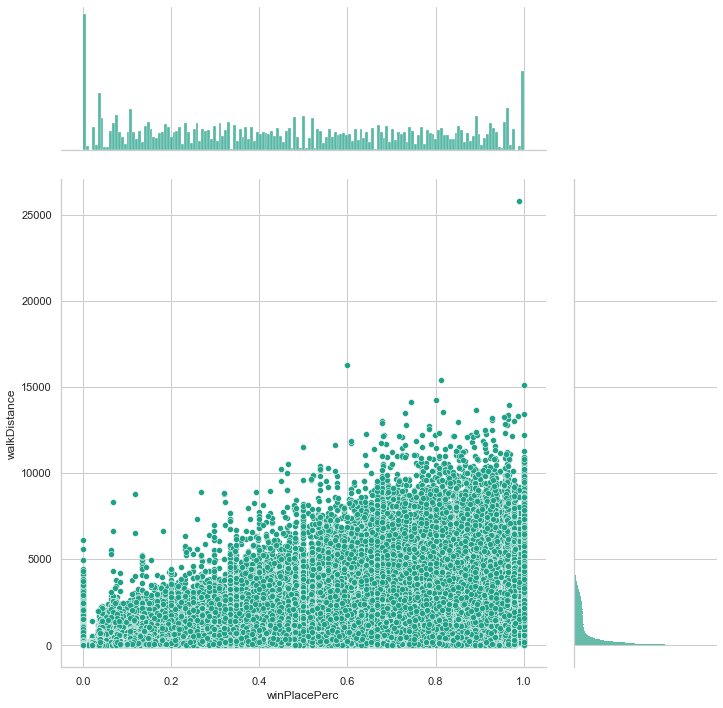

In [34]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color=viridis[2])
plt.show()

- `winPlacePerc`와 `walkDistance` 사이에는 좀 높은 상관관계가 있습니다.

## Ride

In [19]:
sns.set_theme(style="whitegrid", palette="Oranges")

In [20]:
print(f"평균 주행거리 : {train['rideDistance'].mean():.1f}m")
print(f"상위 1퍼 : {train['rideDistance'].quantile(0.99):.1f}m")
print(f"MAX 주행거리 : {train['rideDistance'].max():.1f}m")

평균 주행거리 : 606.1m
상위 1퍼 : 6966.0m
MAX 주행거리 : 40710.0m


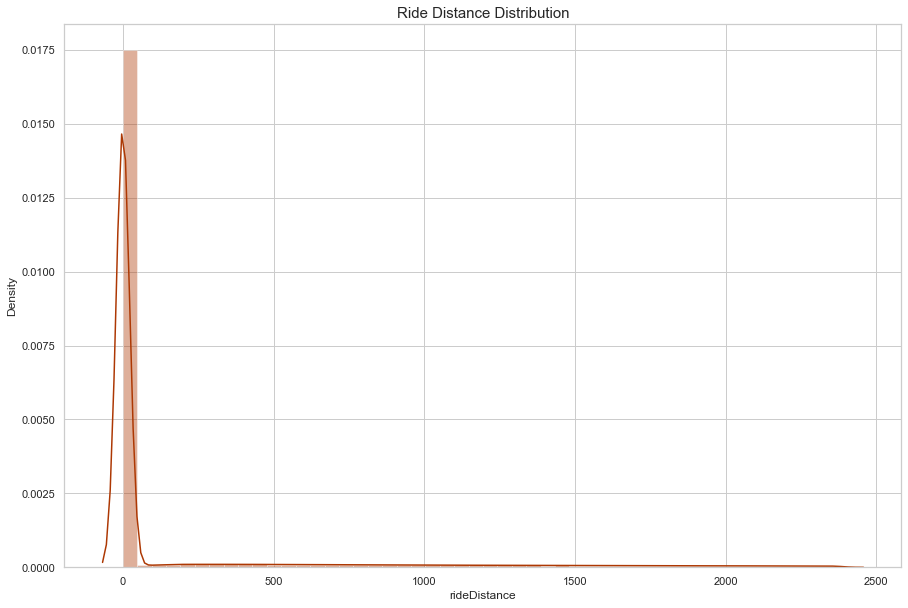

In [21]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'], color=oranges[5])
plt.show()

In [22]:
print(f"{len(data[data['rideDistance'] == 0])}명의 플레이어는 ({100*len(data1[data1['rideDistance']==0])/len(train):.4f}%) 0미터를 주행했습니다.")

3309429명의 플레이어는 (23.1022%) 0미터를 주행했습니다.


- 이것은 차량을 탑승하지 않았다는 말입니다.

In [ ]:
# sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color=oranges[5])
# plt.show()

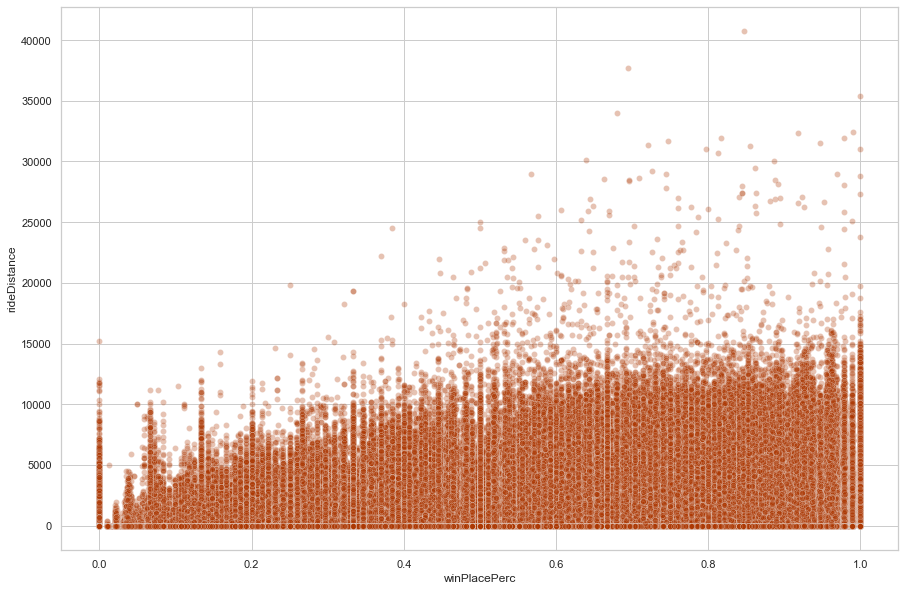

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="winPlacePerc", y="rideDistance", data=train, color=oranges[5], alpha=0.3)
plt.show()

- `winPlacePerc`와 `rideDistance` 사이에는 약간 상관관계가 있습니다.

## Destroy a vehicle

- 차량을 파괴하는 것은 플레이어가 기술을 가지고 있다는 것을 보여줍니다.

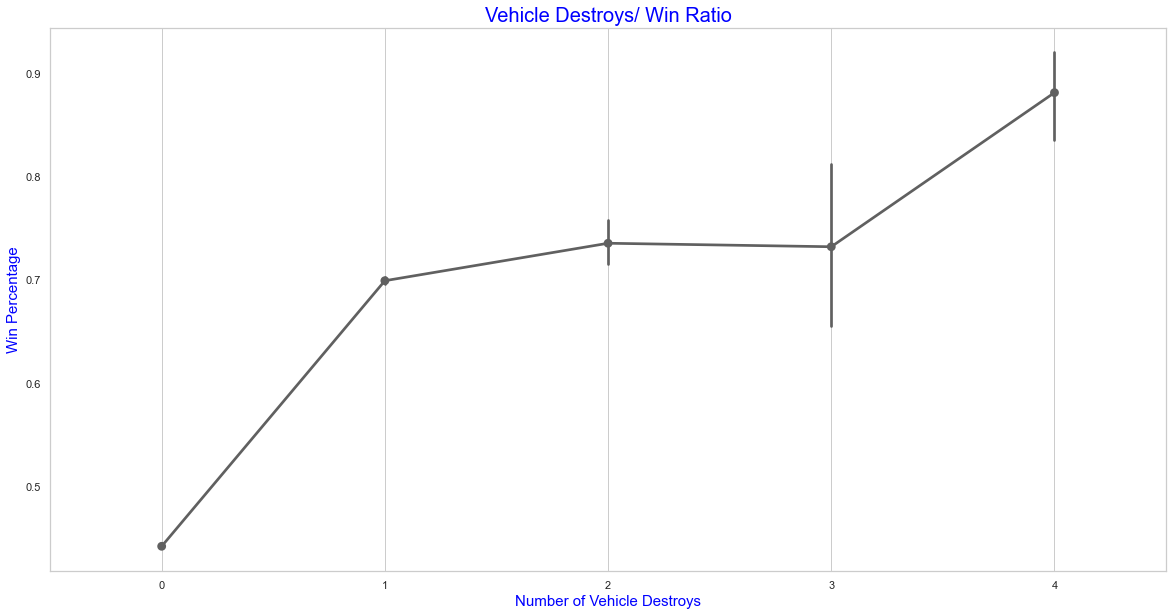

In [39]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

- 차량 한 대를 파괴하면 승산이 높아집니다.

## Swim

In [40]:
sns.set_theme(style="whitegrid", palette="Blues")

In [42]:
print(f"평균 수영거리 : {train['swimDistance'].mean():.1f}m")
print(f"상위 1퍼 : {train['swimDistance'].quantile(0.99):.1f}m")
print(f"MAX 수영거리 : {train['swimDistance'].max():.1f}m")

평균 수영거리 : 4.5m
상위 1퍼 : 123.0m
MAX 수영거리 : 3823.0m


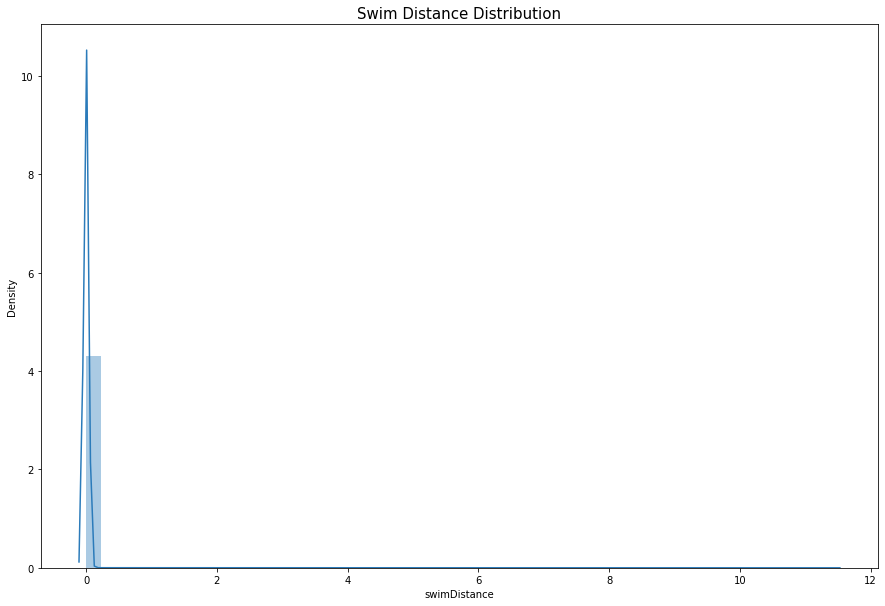

In [4]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'], color=blues[4])
plt.show()

- 거의 아무도 수영하지 않습니다. 
- 수영 거리를 4개 그룹으로 나누어 winPlacePerc과 관계 plot을 그려보겠습니다.

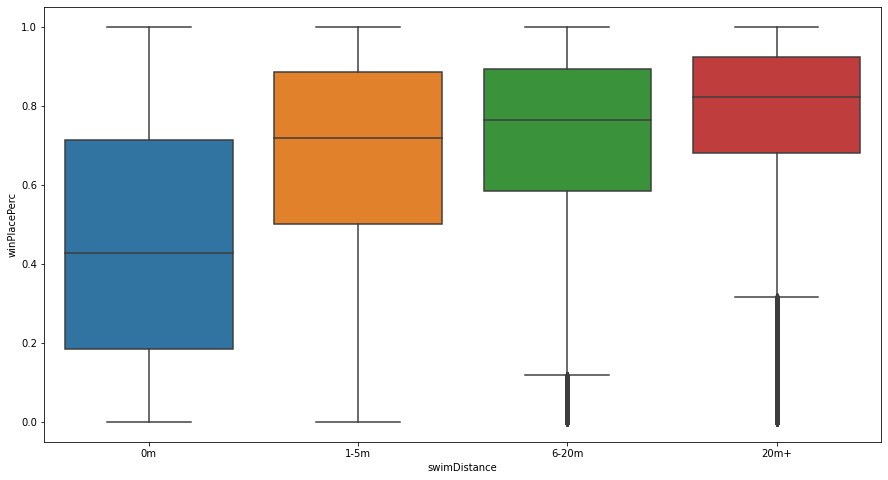

In [7]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

- 수영을 하면 정상에 오르는 것 같습니다. 하지만
- **PUBG에 몇개의 맵은 물이 거의 없습니다.**

## Heal

In [11]:
print(f"평균 heal 횟수 : {train['heals'].mean():.1f}번")
print(f"상위 1퍼 : {train['heals'].quantile(0.99)}번")
print(f"MAX heal 횟수 : {train['heals'].max()}번")

평균 heal 횟수 : 1.4번
상위 1퍼 : 12.0번
MAX heal 횟수 : 80번


In [13]:
print(f"평균 도핑 횟수 : {train['boosts'].mean():.1f}번")
print(f"상위 1퍼 : {train['boosts'].quantile(0.99):.1f}번")
print(f"MAX 도핑 횟수 : {train['boosts'].max()}번")

평균 도핑 횟수 : 1.1번
상위 1퍼 : 7.0번
MAX 도핑 횟수 : 33번


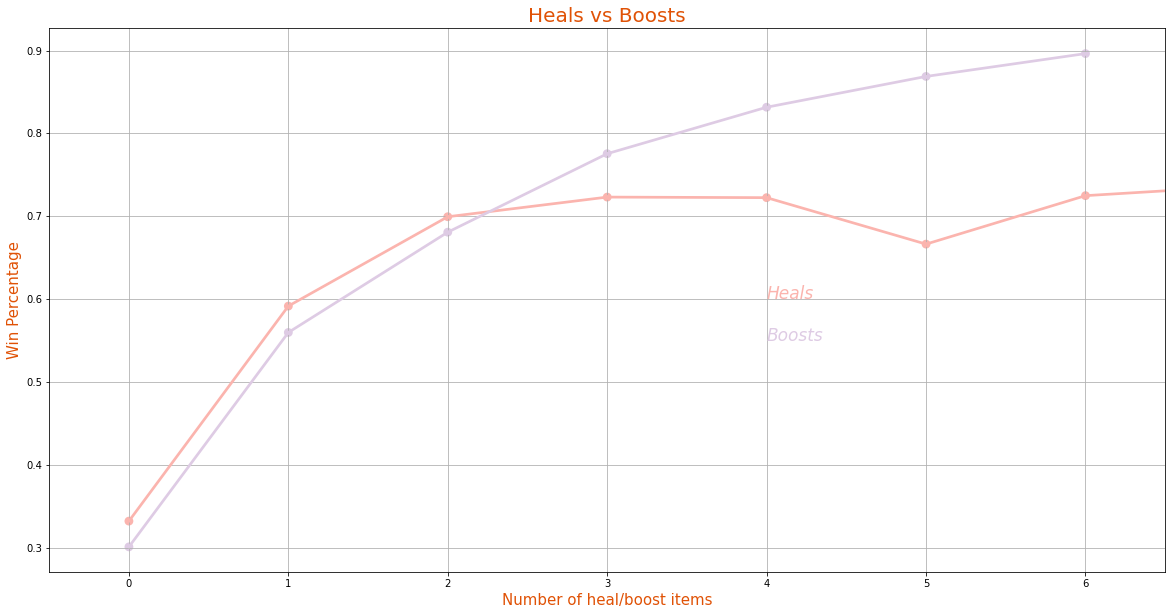

In [16]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals', y='winPlacePerc', data=data, color=pastel1[0])
sns.pointplot(x='boosts', y='winPlacePerc', data=data, color=pastel1[3])
plt.text(4,0.6,'Heals', color=pastel1[0], fontsize = 17, style = 'italic')
plt.text(4,0.55,'Boosts', color=pastel1[3], fontsize = 17, style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color=oranges[-2])
plt.ylabel('Win Percentage',fontsize = 15,color=oranges[-2])
plt.title('Heals vs Boosts',fontsize = 20,color=oranges[-2])
plt.grid()
plt.show()

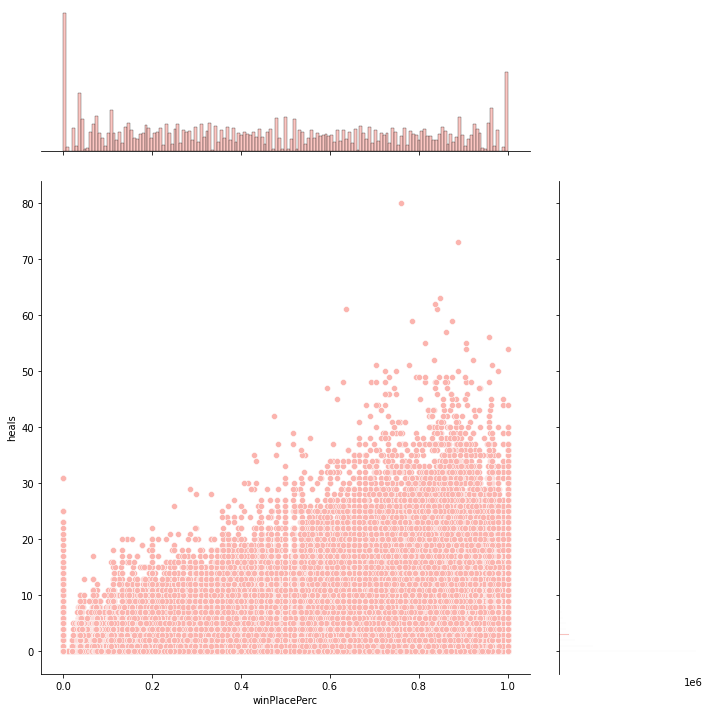

In [17]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color=pastel1[0])
plt.show()

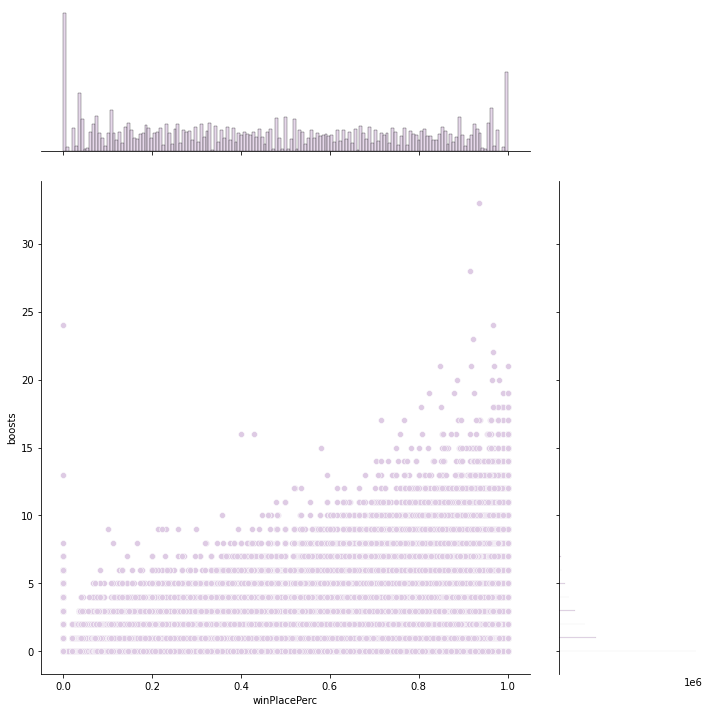

In [18]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color=pastel1[3])
plt.show()

- 힐링과 부스팅은 확실히 winPlacePerc와 관련이 있습니다.
- 부스팅은 그 이상입니다.

- 지금까지 모든 그래프에서 값이 0이면 비정상적인 동작이 발생합니다.

## Solos, Duos and Squads